# Importing Necessary Libraries

In [ ]:
import numpy as np                     # linear algebra
import pandas as pd                    # for data processing and to read csv files
import matplotlib.pyplot as plt        # for data visualization
import seaborn as sns                  # statistical visualization
%matplotlib inline

# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/HeartDiseaseTrain-Test.csv')

# data analysis

In [ ]:
df.shape   # shape of the dataset or size of the dataset

(1025, 14)

In [ ]:
df.head()  # to see the contents of the dataset

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [ ]:
df.info() # to see the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [ ]:
df.isnull().sum()   # to check the null values

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [ ]:
#df.drop(['age'],axis=1)
df.drop(['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak'],axis=1, inplace=True)

In [ ]:
df.head()

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia,target
0,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,Two,Reversable Defect,0
1,Male,Typical angina,Greater than 120 mg/ml,Normal,Yes,Upsloping,Zero,Reversable Defect,0
2,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,Yes,Upsloping,Zero,Reversable Defect,0
3,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,One,Reversable Defect,0
4,Female,Typical angina,Greater than 120 mg/ml,ST-T wave abnormality,No,Flat,Three,Fixed Defect,0


# Replacing the data with numberical values

In [ ]:
# Replacing Data in Sex Column
df["sex"].replace({"Male" : 1,"Female" : 0}, inplace=True)

# Replacing CP Column
df["chest_pain_type"].replace({"Typical angina" : 1,"Atypical angina" : 2,"Non-anginal pain" : 3,"Asymptomatic" : 4}, inplace=True)

# Replacing Data in FBS
df["fasting_blood_sugar"].replace({"Greater than 120 mg/ml" : 1,"Lower than 120 mg/ml" : 0}, inplace=True)

# Replacing Data in restecg
df["rest_ecg"].replace({"Normal" : 0, "ST-T wave abnormality" : 1,"Left ventricular hypertrophy" : 2}, inplace=True)

# Replacing Data in exang
df["exercise_induced_angina"].replace({"Yes" : 1, "No" : 0}, inplace=True)

# Replacing Data in slope
df["slope"].replace({"Upsloping" : 1,"Flat" : 2,"Downsloping" : 3}, inplace=True)

# Replacing Vessels_colored_by_flourosopy
df["vessels_colored_by_flourosopy"].replace({"Zero" : 0, "One" : 1, "Two" : 2, "Three" : 3, "Four" : 4}, inplace=True)

# Replacing Data in thalassemial
df["thalassemia"].replace({"Normal" : 3, "Fixed Defect" : 6, "Reversable Defect" : 7, "No" : 0}, inplace=True)

In [ ]:
df.head()

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia,target
0,1,1,0,1,0,3,2,7,0
1,1,1,1,0,1,1,0,7,0
2,1,1,0,1,1,1,0,7,0
3,1,1,0,1,0,3,1,7,0
4,0,1,1,1,0,2,3,6,0


# Getting Features and Target Data ready

In [ ]:
X = df.drop('target',axis =1)
y = df['target']

In [ ]:
X.head()


,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
0,1,1,0,1,0,3,2,7
1,1,1,1,0,1,1,0,7
2,1,1,0,1,1,1,0,7
3,1,1,0,1,0,3,1,7
4,0,1,1,1,0,2,3,6


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# PCA for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_pca = pca.fit(X)

X = pca.transform(X)
X = pd.DataFrame(data=X)

# Scaling the data using min max scaler

In [ ]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,0,1
0,0.190410,0.243154
1,0.296500,0.207837
2,0.301798,0.198943
3,0.267266,0.201613
4,0.181159,0.418742


# Outlier Rejection

In [ ]:
# q25,q75 = np.percentile(a = X,q=[25,75])
# print(q25)
# IQR = q75 - q25
# upper_limit = q75+(1.5*IQR)
# lower_limit = q25-(1.5*IQR)
# print(lower_limit,upper_limit)

In [ ]:
# X_filtered= X[(X[0]>lower_limit)&(X[0]<upper_limit)]
# print(X_filtered)
# def IQR_bounds(dataframe, column_name, multiple):
#     lower_quantile = dataframe[column_name].quantile(0.25)
#     upper_quantile = dataframe[column_name].quantile(0.75)
#     IQR = upper_quantile - lower_quantile
#     lower_bound = lower_quantile - multiple * IQR
#     upper_bound = upper_quantile + multiple * IQR
#     return lower_bound, upper_bound

# columns = [0,1]
# column_bounds = {}
# for column in columns:
#     lower_bound, upper_bound =  IQR_bounds(X, column, 1.5)
#     column_bounds[column] = [lower_bound, upper_bound]
# X_filtered = X[(X[0]<column_bounds[0][0])&(X[0]>column_bounds[0][1])|(X[1]<column_bounds[1][0])&(X[1]>column_bounds[1][1])]
# print(X_filtered)


In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
df_outlier_removed=remove_outlier_IQR(X)
print(df_outlier_removed)

             0         1
0     0.190410  0.243154
1     0.296500  0.207837
2     0.301798  0.198943
3     0.267266  0.201613
4     0.181159  0.418742
...        ...       ...
1020  0.474172  0.230072
1021  0.230063  0.230543
1022  0.300715  0.346190
1023  0.416344  0.278995
1024  0.256342  0.215265

[1025 rows x 2 columns]


# Model

In [ ]:
from sklearn.cluster import KMeans     # K means clustering library
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

# K-Means model parameters study

In [ ]:
kmeans.cluster_centers_

array([[0.53856273, 0.20414748],
       [0.29005152, 0.28620942]])

In [ ]:
kmeans.inertia_

28.94486314909033

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 248 out of 1025 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.24


# Using Elbow Method

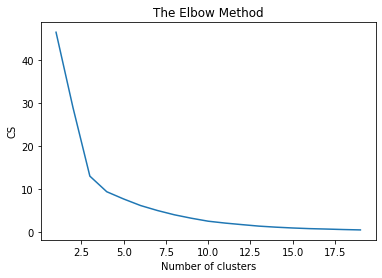

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10000, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 20), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
import warnings
warnings.filterwarnings("ignore")

# K-Means with different clusters

In [ ]:
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, random_state=1,max_iter = 100,verbose = 0,algorithm = "full")
    kmeans.fit(X)
    # check how many of the samples were correctly labeled
    labels = kmeans.labels_
    correct_labels = sum(y == labels)
    print(i)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

1
Result: 499 out of 1025 samples were correctly labeled.
Accuracy score: 0.49
2
Result: 801 out of 1025 samples were correctly labeled.
Accuracy score: 0.78
3
Result: 228 out of 1025 samples were correctly labeled.
Accuracy score: 0.22
4
Result: 199 out of 1025 samples were correctly labeled.
Accuracy score: 0.19
5
Result: 101 out of 1025 samples were correctly labeled.
Accuracy score: 0.10
6
Result: 94 out of 1025 samples were correctly labeled.
Accuracy score: 0.09
7
Result: 54 out of 1025 samples were correctly labeled.
Accuracy score: 0.05
8
Result: 68 out of 1025 samples were correctly labeled.
Accuracy score: 0.07
9
Result: 221 out of 1025 samples were correctly labeled.
Accuracy score: 0.22
10
Result: 324 out of 1025 samples were correctly labeled.
Accuracy score: 0.32
11
Result: 320 out of 1025 samples were correctly labeled.
Accuracy score: 0.31
12
Result: 235 out of 1025 samples were correctly labeled.
Accuracy score: 0.23
13
Result: 46 out of 1025 samples were correctly lab